In [1]:
import torch
import torchvision.transforms as T
from torchvision.utils import make_grid

from lightly.transforms.byol_transform import (BYOLTransform,
                                               BYOLView1Transform,
                                               BYOLView2Transform)

from wilds import get_dataset
from wilds.common.data_loaders import get_train_loader

import matplotlib.pyplot as plt

/home/yasin/anaconda3/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'libc10_cuda.so: cannot open shared object file: No such file or directory'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [2]:
train_transform=T.Compose([
    BYOLView1Transform(
        input_size=96, 
        gaussian_blur=0.0,
        vf_prob=0.5,
        # min_scale=0.5,

        cj_bright=0.2,
        cj_contrast=0.2,
        cj_sat=0.2,
        cj_hue=0.1,

        normalize=False # for visualization, TODO: remove
    ),
])

In [3]:
labeled_dataset = get_dataset(dataset="camelyon17",
                        download=True, root_dir='../../data', unlabeled=False)   

In [4]:
images = torch.cat([T.ToTensor()(labeled_dataset.__getitem__(idx)[0])[None] for idx in range(8)])
images_tf_old = torch.cat([train_transform(labeled_dataset.__getitem__(idx)[0])[None] for idx in range(8)])

In [5]:
images.shape

torch.Size([8, 3, 96, 96])

In [6]:
images_tf_old.shape

torch.Size([8, 3, 96, 96])

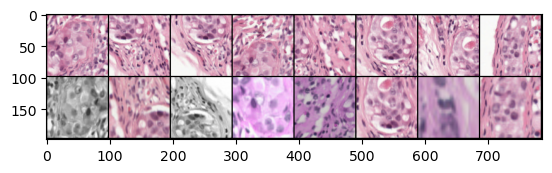

In [7]:
plt.imshow(make_grid(torch.cat([images, images_tf_old], dim=0), nrow=8).permute(1,2,0))